In [1]:
# import networkx
import rustworkx as rx
from rustworkx.visualization import graphviz_draw
from rustworkx.visualization import mpl_draw

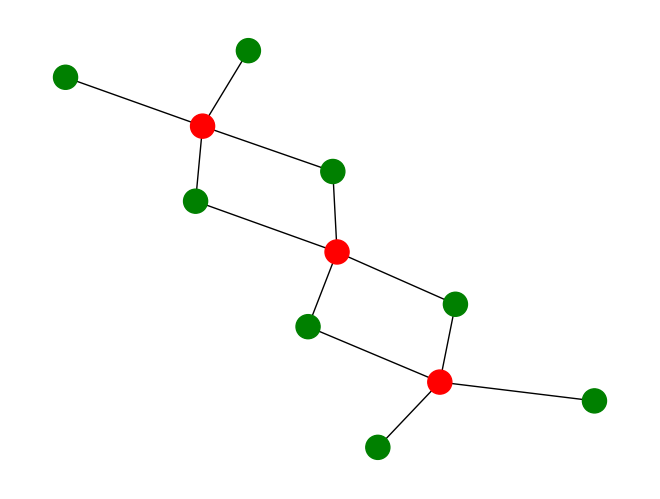

In [32]:
fenceline = rx.PyGraph()

num_modules = 3
periodic = False

qubits = [
    fenceline.add_node(f"q{i}") for i in range(num_modules * 2 + (not periodic) * 2)
]
snails = [fenceline.add_node(f"s{i}") for i in range(num_modules)]

# qubits = [fenceline.add_node({"color": "green"}) for i in range(num_modules * 2)]
# snails = [fenceline.add_node({"color": "red"}) for i in range(num_modules)]

# add edges
for module_idx in range(num_modules - periodic):
    fenceline.add_edges_from(
        [
            (q, snails[module_idx], 0)
            for q in qubits[module_idx * 2 : module_idx * 2 + 4]
        ]
    )

# last case is periodic, wraps around to the first module
if periodic:
    fenceline.add_edges_from([(q, snails[-1], 0) for q in qubits[-2:] + qubits[:2]])

node_color_list = [
    "green" if node in qubits else "red" for node in fenceline.node_indices()
]
mpl_draw(fenceline, node_color=node_color_list)

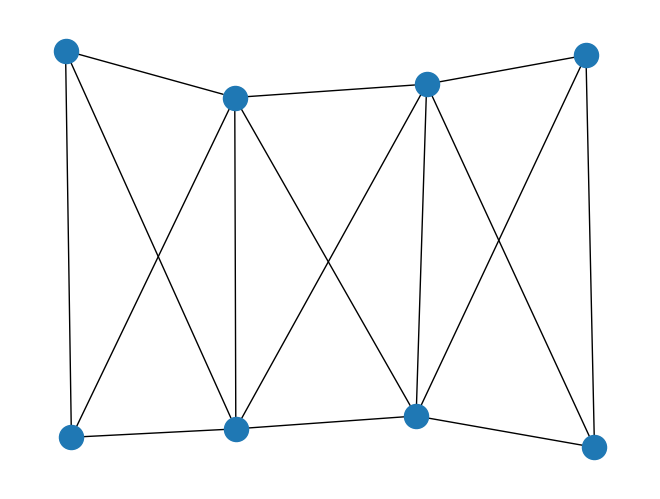

In [33]:
# from fenceline create a qubit-qubit connectivity graph
# create a new graph where only nodes are qubits
# the edges represent they are connected, which is determined by if they share a snail
qubit_connectivity = rx.PyGraph()
qubit_connectivity.add_nodes_from(qubits)

for snail in snails:
    qubits_in_snail = fenceline.neighbors(snail)
    for q1 in qubits_in_snail:
        for q2 in qubits_in_snail:
            if q1 != q2 and q1 < q2:
                # Check if the edge already exists before adding
                if not qubit_connectivity.has_edge(q1, q2):
                    qubit_connectivity.add_edge(q1, q2, True)

mpl_draw(qubit_connectivity)

In [34]:
# finally we need to create an interaction graph
# here every edge from the qubit connectivity graph becomes an node
# the edge weights then represent how much interference there is between those interactions
# we have to do some symmetry breaking, because some edges can be created by multiple snails
# but we want to be consistent that each edge is made by only one snail

In [3]:
# quickly want to test how many colors each of the topologies needs
from corral_crowding.topologies import (
    ring,
    square,
    tworing,
    hex_topo,
    corral,
    denselattice,
    build_graphs,
)

corral

[[8, 9, 10, 11, 12, 13, 14, 23],
 [0, 1, 2, 3, 4, 5, 6, 7, 15, 16, 17, 18, 19, 20, 21, 22],
 [(0, 8),
  (1, 8),
  (1, 9),
  (2, 9),
  (2, 10),
  (3, 10),
  (3, 11),
  (4, 11),
  (4, 12),
  (5, 12),
  (5, 13),
  (6, 13),
  (6, 14),
  (7, 14),
  (8, 15),
  (8, 16),
  (9, 16),
  (9, 17),
  (10, 17),
  (10, 18),
  (11, 18),
  (11, 19),
  (12, 19),
  (12, 20),
  (13, 20),
  (13, 21),
  (14, 21),
  (14, 22),
  (23, 7),
  (23, 22),
  (23, 0),
  (23, 15)]]